In [ ]:
import HMC5883L_Library as hmc
%matplotlib inline

Iteration #4
--------------------------------------------------
Enter desired data points: 
160
--------------------------------------------------
Time remaining: 2seconds
--------------------------------------------------
        X      Y     Z
159  1.36   1.15 -1.32
158 -0.64   1.15  1.68
157  0.36   1.15 -0.32
156  0.36   1.15 -1.32
155  1.36  -4.85 -1.32
154 -2.64   0.15  0.68
153  0.36  -0.85  0.68
152 -0.64  -1.85  0.68
151 -0.64   1.15 -2.32
150 -0.64  -4.85 -4.32
149  0.36   0.15 -0.32
148  1.36  -2.85 -0.32
147 -0.64  -2.85 -0.32
146 -0.64  -1.85  0.68
145  2.36  -2.85 -1.32
144 -1.64  -0.85  2.68
143  0.36  -2.85  1.68
142 -0.64  -1.85 -2.32
141  1.36  -1.85  1.68
140 -2.64   3.15 -0.32
139  1.36   0.15 -2.32
138  0.36  -1.85  0.68
137  1.36  -2.85 -0.32
136 -2.64  -0.85 -3.32
135 -0.64  -0.85 -0.32
134 -1.64   0.15 -1.32
133  2.36  -2.85 -2.32
132 -0.64  -3.85 -1.32
131  1.36   0.15 -0.32
130 -2.64  -1.85 -1.32
..    ...    ...   ...
29   3.36  -1.85 -2.32
28   0.36  -3.85  

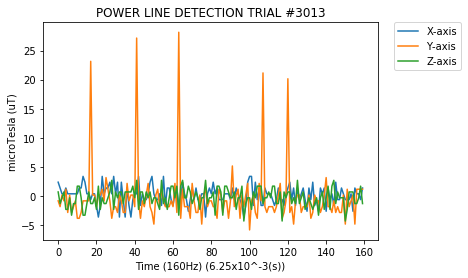

--------------------------------------------------
Saved #3013 in: C:/Users/jd17033/Desktop/mfvd/Saves/


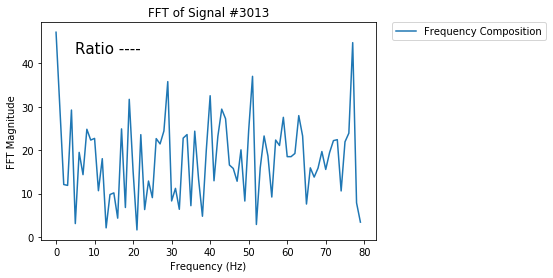

--------------------------------------------------
Do you want to Quit? [Y / n]


In [ ]:
###  MAIN PROGRAM   ###

# Prompts user to configure settings/options associated with the HMC5883L.
hmc.Settings_Config()

i = 0

# Entire program runs on a loop until explicitly exited.
while(1):
    
    # Clears output terminal.
    hmc.clear_output()
    
    # Responisble for prompting user and recording the input.
    hmc.Prompt_Iteration_Amount(i)
    
    # Prepares the ESP32 for data transmission.
    hmc.Begin_Signal()

    hmc.Set_Average()
    
    # Constantly reads in 1 seconds worth of data (160 data points). Prints out
    #   strength of signal based on min and max of the FFT's frequency ratio.
    if(hmc.Operation_Mode == "CONTINUOUS_MODE"):
        while(1):
            
            # Collects incoming data from the ESP32/HMC5883L.
            df = hmc.Collect_Data()
            
            # Clears output terminal.
            hmc.clear_output()

            # Displays signal strength to screen.
            hmc.Display_Signal_Strength(df,i)
    
    # Reads in a user set amount of data. Proceeds to save/print out results in table/graph form.
    elif(hmc.Operation_Mode == "STATIONARY_MODE"):
        
        # Estimates time until completion of data collection and plotting.
        hmc.Time_Until_Done()
        
        # Collects incoming data from the ESP32/HMC5883L.
        df = hmc.Collect_Data()
        
        # Displays the data collected from the magnetometer.
        #hmc.Display_Table(df) #DataFrame Table
        hmc.Display_DF(df,i)  #DataFrame Graph
        hmc.Display_FFT(df)   #DataFrame FFT

        # Prompts user to decide if they wish to continue or quit.
        print("Do you want to Quit? [Y / n]")
        quit = input()
        if(quit == 'Y'):
            # Closes serial port.
            hmc.Serial_Close()
            break
        else:
            i = i + 1